# A less problematic dataset

This uses a dataset that doesn't make me cringe and has a nice graph of the difference between trained and validated accuracy. This should make future neural nets easier to make. It also has a onehot categorisation of quality.

The loss graph is important because it means you can take a non-bruteforce approach to improving the net

In [407]:
from math import floor

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import activations, initializers, layers, losses, metrics, optimizers

In [408]:
df = pd.read_csv("WineQT.csv", index_col="Id")

x = df.drop(columns=["quality"])
y = df.quality.to_numpy()
y_onehot = np.eye(11)[y]  # 0 to 10

In [409]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [410]:
x_train, x_test, y_train, y_test = train_test_split(x, y_onehot, test_size=0.30)

In [411]:
def train(epochs):
    node_multiplier = 20
    max_nodes = x.shape[0] / (node_multiplier * (x.shape[1] + 11))
    layer_1_units = floor((max_nodes / 3) * 2)
    layer_2_units = floor(max_nodes - layer_1_units)

    model = tf.keras.Sequential()
    model.add(
        layers.Dense(
            layer_1_units,
            kernel_initializer=initializers.random_uniform,
            activation=activations.swish,
        )

    )
    model.add(
        layers.Dropout(
            0.1
        )

    )
    model.add(
        layers.Dense(
            layer_2_units,
            kernel_initializer=initializers.random_uniform,
            activation=activations.swish,
        )
    )
    model.add(
        layers.Dense(
            layer_2_units,
            kernel_initializer=initializers.random_uniform,
            activation=activations.swish,
        )
    )
    model.add(
        layers.Dense(
            11,
            kernel_initializer=initializers.random_uniform,
            activation=activations.softmax,
        )
    )

    model.compile(
        loss=losses.CategoricalCrossentropy(),
        optimizer=optimizers.Adamax(learning_rate=0.003),
        metrics=[
            metrics.CategoricalAccuracy(
                name='accuracy'
            ),
        ]
    )

    return model.fit(
        x_train, y_train,
        validation_data=(x_test, y_test),
        batch_size=32,
        epochs=epochs,
    )

There is a nice guide on how to read these on [peltarion](https://peltarion.com/knowledge-center/documentation/evaluation-view/loss-and-metrics)

In [412]:
def show_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(history.history['val_loss']))
    plt.figure(figsize=(15, 10))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.title('Training and Validation Accuracy')
    plt.show()


In [413]:
history = train(200)

Epoch 1/200
25/25 [==============================] - 1s 11ms/step - loss: 2.3563 - accuracy: 0.3837 - val_loss: 2.3155 - val_accuracy: 0.4402
Epoch 2/200
25/25 [==============================] - 0s 2ms/step - loss: 2.2729 - accuracy: 0.4150 - val_loss: 2.2313 - val_accuracy: 0.4402
Epoch 3/200
25/25 [==============================] - 0s 2ms/step - loss: 2.1785 - accuracy: 0.4150 - val_loss: 2.1230 - val_accuracy: 0.4402
Epoch 4/200
25/25 [==============================] - 0s 3ms/step - loss: 2.0425 - accuracy: 0.4150 - val_loss: 1.9553 - val_accuracy: 0.4402
Epoch 5/200
25/25 [==============================] - 0s 3ms/step - loss: 1.8323 - accuracy: 0.3675 - val_loss: 1.7002 - val_accuracy: 0.3761
Epoch 6/200
25/25 [==============================] - 0s 3ms/step - loss: 1.5633 - accuracy: 0.3487 - val_loss: 1.4069 - val_accuracy: 0.4315
Epoch 7/200
25/25 [==============================] - 0s 4ms/step - loss: 1.3611 - accuracy: 0.4150 - val_loss: 1.2643 - val_accuracy: 0.4402
Epoch 8/200


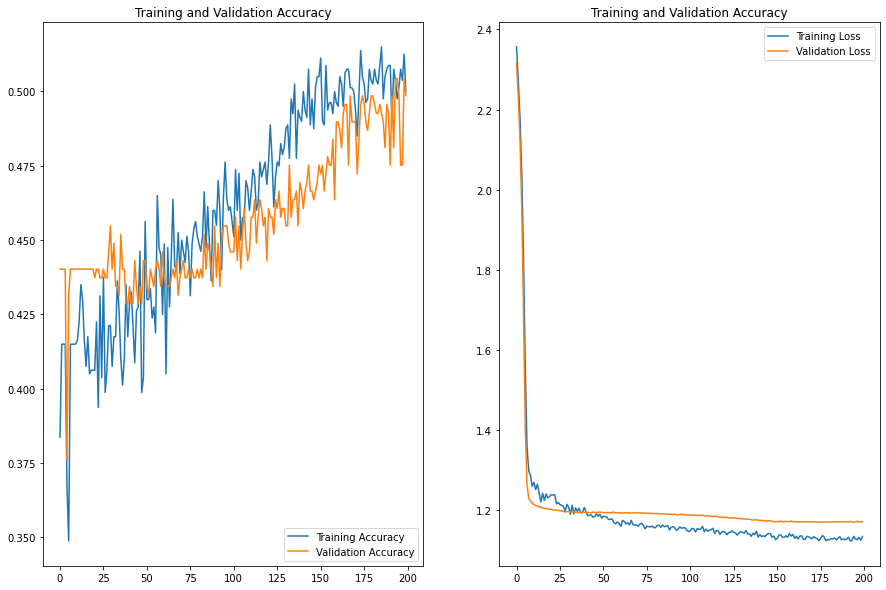

In [414]:
show_history(history)

Currently this dataset is under fitting. One way to resolve that is to train longer

In [415]:
history = train(1000)

Epoch 1/1000
25/25 [==============================] - 1s 8ms/step - loss: 2.3577 - accuracy: 0.4013 - val_loss: 2.3185 - val_accuracy: 0.3878
Epoch 2/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.2789 - accuracy: 0.4112 - val_loss: 2.2414 - val_accuracy: 0.3878
Epoch 3/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.1984 - accuracy: 0.4112 - val_loss: 2.1610 - val_accuracy: 0.3878
Epoch 4/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.1150 - accuracy: 0.4112 - val_loss: 2.0780 - val_accuracy: 0.3878
Epoch 5/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.0297 - accuracy: 0.4112 - val_loss: 1.9927 - val_accuracy: 0.3878
Epoch 6/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.9417 - accuracy: 0.4112 - val_loss: 1.9068 - val_accuracy: 0.3878
Epoch 7/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.8538 - accuracy: 0.4112 - val_loss: 1.8208 - val_accuracy: 0.3878
Epoch 

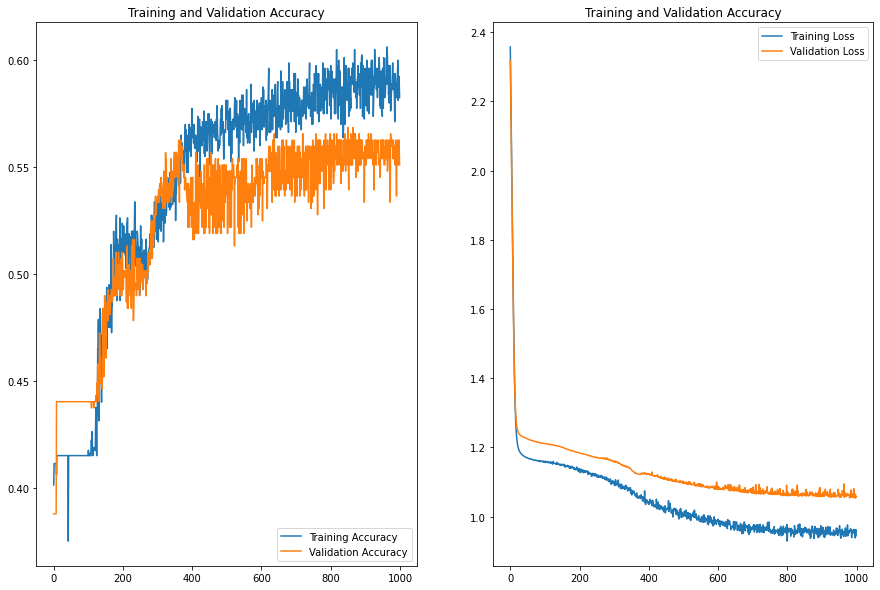

In [416]:
show_history(history)